In [28]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [29]:
# read file
df=pd.read_csv('Data/Social_Network_Ads .csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
# checks size of the dataset
df.shape

(400, 5)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [32]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [33]:
# checks for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [34]:
# checks for duplicate values
df.duplicated().sum()

0

In [35]:
# separate labels and features
x=df.iloc[:,2:4].values
y=df.iloc[:,4].values

In [36]:
# split dataset into train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
# split dataset into train and cross validation dataset
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2)

In [38]:
# perform feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_cv=sc.transform(x_cv)

In [39]:
# fitting svc on training dataset to fit the model
classifier= SVC()
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
# Predicting the cross validation set results
y_pred = classifier.predict(x_cv) 
df = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,1
4,1,1


In [41]:
cm = confusion_matrix(y_cv, y_pred)  
print(cm)  

[[42  3]
 [ 0 19]]


In [42]:
acc=(accuracy_score(y_cv, y_pred)*100)  
print('Accuracy is' , acc)  


Accuracy is 95.3125


In [43]:
# applying k-fold cross validation
accuracies = cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)

In [44]:
print("accuracies =\n",accuracies)

accuracies =
 [0.96153846 0.88461538 0.92307692 0.96153846 0.92307692 0.84615385
 0.88461538 0.88       0.92       0.83333333]


In [45]:

accuracies.mean()

0.9017948717948718

In [46]:

accuracies.std()

0.04150188323000635

In [47]:
# applying grid search method to find best model & parameter for our model
grid_param = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'kernel':['rbf'],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
    ]

In [48]:
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [49]:
# fitting model
gd_sr.fit(x_train, y_train)  

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
# finds best parameter
best_parameters = gd_sr.best_params_  
print("best_parameters",best_parameters)  

best_parameters {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [51]:
# finds best score
best_result = gd_sr.best_score_  
print("best_score_",best_result)  

best_score_ 0.91015625


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


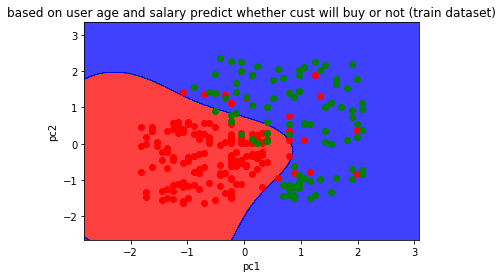

In [52]:
# visualization on training set
x,y=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

plt.title('based on user age and salary predict whether cust will buy or not (train dataset)')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


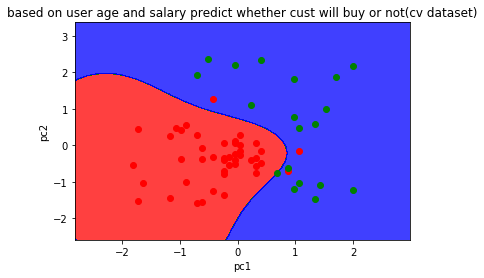

In [53]:
# visualization on cv set
x,y=x_cv,y_cv
x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

plt.title('based on user age and salary predict whether cust will buy or not(cv dataset)')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [54]:
# saving model
import pickle
if acc>=80:
    fileObject = open("test.pkl",'wb')
    pickle.dump(classifier,fileObject)   
    pickle.dump(sc,fileObject)
    pickle.dump(x_test,fileObject)
    pickle.dump(y_test,fileObject)
    
    # here we close the fileObject
    fileObject.close()